[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Mate_MercadosFinancieros/blob/main/Semana7_EigenPortafolios.ipynb)

## Eigen-portfolio construction using Principal Component Analysis (PCA)

### PCA via sklearn.decomposition using S&P 500 Index stock data

Welcome to your 2-nd assignment in Unsupervised Machine Learning in Finance.

In this assignment we look in-depth at model-free factor analysis using PCA. By model-free we mean that we do not rely on any factors such as value or momentum to decompose portfolio returns, but instead using Principal Component Analysis (PCA) to deduce structure of portfolio returns.

We work with S&P 500 index stock data.


In [ ]:
import os
import os.path
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

%matplotlib inline

In [ ]:
tickers1 = "META GOOGL GOOG CHTR TMUS" # Communication services
tickers2 = "AMZN TSLA HD MCD LOW" # Consumer discretionary
tickers3 = "PG COST WMT KO PM"  # Consumer staples
tickers4 = "XOM CVX EOG COP SLB" # Energy
tickers5 = "BRK-B JPM V MA BAC" # Financial
tickers6 = "LLY UNH JNJ ABBV MRK" # Healthcare
tickers7 = "GE CAT RTX UNP UBER" # Industrials
tickers8 = "LIN SHW ECL FCX APD" # Materials
tickers9 = "PLD AMT EQIX WELL PSA" # Real state
tickers10 = "MSFT NVDA AAPL AVGO ADBE" # Technology
tickers11  = "NEE SO DUK CEG AEP" # Utilities

In [ ]:
result = ""
for i in range(1, 12):
    var_name = f'tickers{i}'  # Create the variable name
    result += " " + globals()[var_name]

In [ ]:
result

' META GOOGL GOOG CHTR TMUS AMZN TSLA HD MCD LOW PG COST WMT KO PM XOM CVX EOG COP SLB BRK-B JPM V MA BAC LLY UNH JNJ ABBV MRK GE CAT RTX UNP UBER LIN SHW ECL FCX APD PLD AMT EQIX WELL PSA MSFT NVDA AAPL AVGO ADBE NEE SO DUK CEG AEP'

In [ ]:
asset_prices = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = result,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "1y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        # group_by = 'ticker',
    ).loc[:, 'Adj Close'].dropna()
asset_prices

[*********************100%***********************]  55 of 55 completed


Ticker,AAPL,ABBV,ADBE,AEP,AMT,AMZN,APD,AVGO,BAC,BRK-B,...,SO,TMUS,TSLA,UBER,UNH,UNP,V,WELL,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-31 00:00:00+00:00,186.913528,141.493225,559.340027,75.209351,175.057098,138.009995,287.701569,90.693497,28.073282,360.200012,...,65.209198,134.604980,258.079987,47.230000,469.269348,216.975983,243.760925,80.792702,53.481377,107.423477
2023-09-01 00:00:00+00:00,188.495453,142.687088,563.210022,74.365158,174.545395,138.119995,290.164856,85.743576,28.376831,362.459991,...,64.718185,135.671921,245.009995,47.040001,468.934601,217.428482,246.171951,80.558731,53.139328,109.674538
2023-09-05 00:00:00+00:00,188.734222,140.665207,564.880005,72.907028,174.188187,137.270004,284.985107,85.709190,28.053698,360.470001,...,63.832424,135.237244,256.489990,46.549999,473.434448,212.195175,243.423599,78.823570,52.711765,109.684204
2023-09-06 00:00:00+00:00,181.978806,140.193436,561.940002,73.271553,171.861420,135.360001,285.617981,85.719009,27.799109,361.670013,...,63.784279,132.510574,251.919998,45.900002,469.623810,209.362091,244.237183,79.915367,53.106438,110.631004
2023-09-07 00:00:00+00:00,176.656021,143.370682,560.460022,74.192490,176.244614,137.850006,284.410645,84.221367,27.544521,361.799988,...,64.612267,135.622543,251.490005,46.270000,477.373108,207.138931,245.209549,80.471024,53.764225,110.089973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26 00:00:00+00:00,227.179993,197.440002,559.440002,99.019997,225.309998,175.500000,278.760010,159.619995,39.919998,454.489990,...,86.489998,200.429993,213.210007,72.610001,587.130005,247.839996,268.209991,119.239998,76.029999,118.809998
2024-08-27 00:00:00+00:00,228.029999,195.919998,567.820007,98.540001,226.160004,173.119995,277.910004,161.389999,39.669998,460.630005,...,85.739998,204.029999,209.210007,72.559998,587.349976,250.350006,270.720001,120.260002,76.129997,117.680000
2024-08-28 00:00:00+00:00,226.490005,195.399994,560.539978,98.540001,225.250000,170.800003,276.790009,158.179993,39.950001,464.589996,...,85.750000,201.410004,205.750000,71.849998,588.539978,252.669998,269.190002,121.070000,76.080002,116.519997


In [ ]:
n_stocks_show = 12
print('Asset prices shape', asset_prices.shape)
asset_prices.iloc[:, :n_stocks_show]

Asset prices shape (252, 55)


Ticker,AAPL,ABBV,ADBE,AEP,AMT,AMZN,APD,AVGO,BAC,BRK-B,CAT,CEG
Date,,,,,,,,,,,,
2023-08-31 00:00:00+00:00,186.913528,141.493225,559.340027,75.209351,175.057098,138.009995,287.701569,90.693497,28.073282,360.200012,276.258820,103.364563
2023-09-01 00:00:00+00:00,188.495453,142.687088,563.210022,74.365158,174.545395,138.119995,290.164856,85.743576,28.376831,362.459991,281.290100,106.470650
2023-09-05 00:00:00+00:00,188.734222,140.665207,564.880005,72.907028,174.188187,137.270004,284.985107,85.709190,28.053698,360.470001,276.750183,105.240120
2023-09-06 00:00:00+00:00,181.978806,140.193436,561.940002,73.271553,171.861420,135.360001,285.617981,85.719009,27.799109,361.670013,277.998138,105.825615
2023-09-07 00:00:00+00:00,176.656021,143.370682,560.460022,74.192490,176.244614,137.850006,284.410645,84.221367,27.544521,361.799988,276.553619,107.711105
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26 00:00:00+00:00,227.179993,197.440002,559.440002,99.019997,225.309998,175.500000,278.760010,159.619995,39.919998,454.489990,351.160004,194.889999
2024-08-27 00:00:00+00:00,228.029999,195.919998,567.820007,98.540001,226.160004,173.119995,277.910004,161.389999,39.669998,460.630005,351.119995,196.139999
2024-08-28 00:00:00+00:00,226.490005,195.399994,560.539978,98.540001,225.250000,170.800003,276.790009,158.179993,39.950001,464.589996,348.200012,193.770004


In [ ]:
asset_prices = asset_prices.tz_localize(None)

In [ ]:
asset_prices

Ticker,AAPL,ABBV,ADBE,AEP,AMT,AMZN,APD,AVGO,BAC,BRK-B,...,SO,TMUS,TSLA,UBER,UNH,UNP,V,WELL,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-31,186.913528,141.493225,559.340027,75.209351,175.057098,138.009995,287.701569,90.693497,28.073282,360.200012,...,65.209198,134.604980,258.079987,47.230000,469.269348,216.975983,243.760925,80.792702,53.481377,107.423477
2023-09-01,188.495453,142.687088,563.210022,74.365158,174.545395,138.119995,290.164856,85.743576,28.376831,362.459991,...,64.718185,135.671921,245.009995,47.040001,468.934601,217.428482,246.171951,80.558731,53.139328,109.674538
2023-09-05,188.734222,140.665207,564.880005,72.907028,174.188187,137.270004,284.985107,85.709190,28.053698,360.470001,...,63.832424,135.237244,256.489990,46.549999,473.434448,212.195175,243.423599,78.823570,52.711765,109.684204
2023-09-06,181.978806,140.193436,561.940002,73.271553,171.861420,135.360001,285.617981,85.719009,27.799109,361.670013,...,63.784279,132.510574,251.919998,45.900002,469.623810,209.362091,244.237183,79.915367,53.106438,110.631004
2023-09-07,176.656021,143.370682,560.460022,74.192490,176.244614,137.850006,284.410645,84.221367,27.544521,361.799988,...,64.612267,135.622543,251.490005,46.270000,477.373108,207.138931,245.209549,80.471024,53.764225,110.089973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,227.179993,197.440002,559.440002,99.019997,225.309998,175.500000,278.760010,159.619995,39.919998,454.489990,...,86.489998,200.429993,213.210007,72.610001,587.130005,247.839996,268.209991,119.239998,76.029999,118.809998
2024-08-27,228.029999,195.919998,567.820007,98.540001,226.160004,173.119995,277.910004,161.389999,39.669998,460.630005,...,85.739998,204.029999,209.210007,72.559998,587.349976,250.350006,270.720001,120.260002,76.129997,117.680000
2024-08-28,226.490005,195.399994,560.539978,98.540001,225.250000,170.800003,276.790009,158.179993,39.950001,464.589996,...,85.750000,201.410004,205.750000,71.849998,588.539978,252.669998,269.190002,121.070000,76.080002,116.519997


In [ ]:
spy = pd.DataFrame(yf.download(
        tickers = "^SPX",
        period = "1y",
        interval = "1d",
    ).loc[:, 'Adj Close'].dropna())
spy.rename(columns={'Adj Close': 'SPX'}, inplace=True)

spy

[*********************100%***********************]  1 of 1 completed


,SPX
Date,
2023-08-31,4507.660156
2023-09-01,4515.770020
2023-09-05,4496.830078
2023-09-06,4465.479980
2023-09-07,4451.140137
...,...
2024-08-26,5616.839844
2024-08-27,5625.799805
2024-08-28,5592.180176


In [ ]:
asset_prices = pd.concat([asset_prices, spy], axis=1)
asset_prices

,AAPL,ABBV,ADBE,AEP,AMT,AMZN,APD,AVGO,BAC,BRK-B,...,TMUS,TSLA,UBER,UNH,UNP,V,WELL,WMT,XOM,SPX
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-31,186.913528,141.493225,559.340027,75.209351,175.057098,138.009995,287.701569,90.693497,28.073282,360.200012,...,134.604980,258.079987,47.230000,469.269348,216.975983,243.760925,80.792702,53.481377,107.423477,4507.660156
2023-09-01,188.495453,142.687088,563.210022,74.365158,174.545395,138.119995,290.164856,85.743576,28.376831,362.459991,...,135.671921,245.009995,47.040001,468.934601,217.428482,246.171951,80.558731,53.139328,109.674538,4515.770020
2023-09-05,188.734222,140.665207,564.880005,72.907028,174.188187,137.270004,284.985107,85.709190,28.053698,360.470001,...,135.237244,256.489990,46.549999,473.434448,212.195175,243.423599,78.823570,52.711765,109.684204,4496.830078
2023-09-06,181.978806,140.193436,561.940002,73.271553,171.861420,135.360001,285.617981,85.719009,27.799109,361.670013,...,132.510574,251.919998,45.900002,469.623810,209.362091,244.237183,79.915367,53.106438,110.631004,4465.479980
2023-09-07,176.656021,143.370682,560.460022,74.192490,176.244614,137.850006,284.410645,84.221367,27.544521,361.799988,...,135.622543,251.490005,46.270000,477.373108,207.138931,245.209549,80.471024,53.764225,110.089973,4451.140137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,227.179993,197.440002,559.440002,99.019997,225.309998,175.500000,278.760010,159.619995,39.919998,454.489990,...,200.429993,213.210007,72.610001,587.130005,247.839996,268.209991,119.239998,76.029999,118.809998,5616.839844
2024-08-27,228.029999,195.919998,567.820007,98.540001,226.160004,173.119995,277.910004,161.389999,39.669998,460.630005,...,204.029999,209.210007,72.559998,587.349976,250.350006,270.720001,120.260002,76.129997,117.680000,5625.799805
2024-08-28,226.490005,195.399994,560.539978,98.540001,225.250000,170.800003,276.790009,158.179993,39.950001,464.589996,...,201.410004,205.750000,71.849998,588.539978,252.669998,269.190002,121.070000,76.080002,116.519997,5592.180176


In [ ]:
print('Last column contains SPX index prices:')
asset_prices.iloc[:, -10:].head()

Last column contains SPX index prices:


,TMUS,TSLA,UBER,UNH,UNP,V,WELL,WMT,XOM,SPX
Date,,,,,,,,,,
2023-08-31,134.604980,258.079987,47.230000,469.269348,216.975983,243.760925,80.792702,53.481377,107.423477,4507.660156
2023-09-01,135.671921,245.009995,47.040001,468.934601,217.428482,246.171951,80.558731,53.139328,109.674538,4515.770020
2023-09-05,135.237244,256.489990,46.549999,473.434448,212.195175,243.423599,78.823570,52.711765,109.684204,4496.830078
2023-09-06,132.510574,251.919998,45.900002,469.623810,209.362091,244.237183,79.915367,53.106438,110.631004,4465.479980
2023-09-07,135.622543,251.490005,46.270000,477.373108,207.138931,245.209549,80.471024,53.764225,110.089973,4451.140137


# Cálculo de retornos por activo

Calculamos los retornos porcentuales (o simples) utilizando los precios.

Despues calcularemos los retornos centrados (menos la media) y los estandarizaremos dividiendolos por su desviación estándas ($\sigma$).

Esta estandarización es necesaria para PCA

In [ ]:
asset_returns = pd.DataFrame(data=np.zeros(shape=(len(asset_prices.index), asset_prices.shape[1])),
                             columns=asset_prices.columns.values,
                             index=asset_prices.index)
normed_returns = asset_returns.copy()

asset_returns = asset_prices.pct_change().dropna()
normed_returns = (asset_returns - asset_returns.mean()) / asset_returns.std()

normed_returns.iloc[-5:, -10:].head()

,TMUS,TSLA,UBER,UNH,UNP,V,WELL,WMT,XOM,SPX
Date,,,,,,,,,,
2024-08-26,0.873693,-0.936406,-1.058997,0.248672,0.295359,0.244617,-0.230165,0.244936,1.639335,-0.521754
2024-08-27,1.851591,-0.542414,-0.115478,-0.045565,0.844780,0.923894,0.573963,-0.018719,-0.779601,0.085030
2024-08-28,-1.632588,-0.477604,-0.504587,0.072725,0.767487,-0.649730,0.422296,-0.189515,-0.806696,-0.882360
2024-08-29,-0.927015,0.079811,0.146169,0.296378,0.123546,1.940705,-0.497497,0.254428,1.045577,-0.123824
2024-08-30,-0.948940,1.111629,0.440986,-0.238287,0.960318,0.726232,-0.049427,0.785401,-0.161311,1.170826


In [ ]:
train_end = datetime.datetime(2024, 2, 28) # Definir alguna fecha para separación de datos en entrenamiento y test.

df_train = None
df_test = None
df_raw_train = None
df_raw_test = None

df_train = normed_returns[normed_returns.index <= train_end].copy()
df_test = normed_returns[normed_returns.index > train_end].copy()

df_raw_train = asset_returns[asset_returns.index <= train_end].copy()
df_raw_test = asset_returns[asset_returns.index > train_end].copy()

print('Train dataset:', df_train.shape)
print('Test dataset:', df_test.shape)

Train dataset: (123, 56)
Test dataset: (128, 56)


Calculamos PCA utilizando toda la data disponible. Despues escogemos un umbral de varianza explicada y vemos el menor número de componentes necesarias para explicar dicha varianza.

# Ajustando PCA

- Calcula la matriz de covarianza utilizando los datos de entrenamiento, **df_train**

- Calcula la matriz de covarianza utilizando los datos de entrenamiento crudos, **df_raw_train**

- Use la clase PCA para ajustar un modelo de PCA a la matriz de covarianza.

In [ ]:
import sklearn.decomposition
import seaborn as sns

stock_tickers = normed_returns.columns.values[:-1]
assert 'SPX' not in stock_tickers, "By accident included SPX index"

n_tickers = len(stock_tickers)
pca = None
cov_matrix = pd.DataFrame(data=np.ones(shape=(n_tickers, n_tickers)), columns=stock_tickers)
cov_matrix_raw = cov_matrix

if df_train is not None and df_raw_train is not None:
    stock_tickers = asset_returns.columns.values[:-1]
    assert 'SPX' not in stock_tickers, "By accident included SPX index"

    #normed covariance matrix
    cov_matrix = df_train.loc[:, df_train.columns != 'SPX'].cov()

    # computing PCA on S&P 500 stocks
    from sklearn.decomposition import PCA
    pca = PCA().fit(cov_matrix)

    # not normed covariance matrix
    cov_matrix_raw = df_raw_train.loc[:, df_raw_train.columns != 'SPX'].cov()

    cov_raw_df = pd.DataFrame({'Variance': np.diag(cov_matrix_raw)}, index=stock_tickers)

    # cumulative variance explained
    var_threshold = 0.8
    var_explained = np.cumsum(pca.explained_variance_ratio_)
    num_comp = np.where(np.logical_not(var_explained < var_threshold))[0][0] + 1  # +1 due to zero based-arrays
    print('%d components explain %.2f%% of variance' %(num_comp, 100* var_threshold))

5 components explain 80.00% of variance


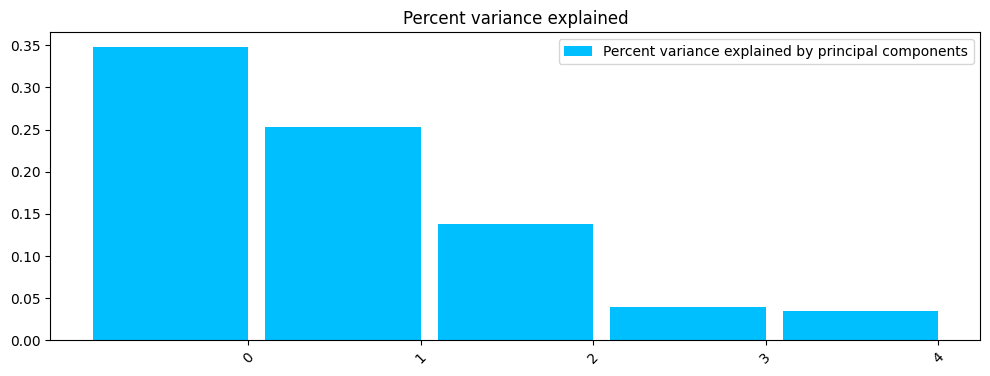

In [ ]:
if pca is not None:
    bar_width = 0.9
    n_asset = int((1 / 10) * normed_returns.shape[1])
    x_indx = np.arange(n_asset)
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    # Eigenvalues are measured as percentage of explained variance.
    rects = ax.bar(x_indx, pca.explained_variance_ratio_[:n_asset], bar_width, color='deepskyblue')
    ax.set_xticks(x_indx + bar_width / 2)
    ax.set_xticklabels(list(range(n_asset)), rotation=45)
    ax.set_title('Percent variance explained')
    ax.legend((rects[0],), ('Percent variance explained by principal components',))

In [ ]:
var_explained

array([0.34825297, 0.60107476, 0.73930504, 0.77882797, 0.81348329,
       0.84041512, 0.85942888, 0.87705823, 0.89235883, 0.90545049,
       0.91604544, 0.92615801, 0.93528378, 0.94306643, 0.95056515,
       0.95704805, 0.96246722, 0.96655346, 0.97038497, 0.97368932,
       0.97695671, 0.97988129, 0.98222388, 0.98432877, 0.98626792,
       0.98794305, 0.98957349, 0.99104966, 0.99231156, 0.99329763,
       0.99411012, 0.99485671, 0.99557309, 0.99616683, 0.99671244,
       0.99716203, 0.99758805, 0.99794688, 0.99827209, 0.99855381,
       0.99883427, 0.99906476, 0.99925328, 0.99940821, 0.99955324,
       0.99965021, 0.99973843, 0.99980943, 0.99986992, 0.99991249,
       0.99995104, 0.99998001, 0.99999996, 1.        , 1.        ])

In [ ]:
if pca is not None:
    projected = pca.fit_transform(cov_matrix)

# Construyendo los eigen-portafolios.

Ahora veamos los primeros 2 eigenportafolios. Usamos la definicion de portafolios de Avellaneda en:
http://math.nyu.edu/faculty/avellane/AvellanedaLeeStatArb20090616.pdf

Siguiendo la definición de Avellaneda, los pesos del portafolio se definen como:
$$Q_i^{(j)} = \frac{v_i^{(j)}}{\sigma_i}$$

donde $j$ es el índice del eigenportafolio y $v_i$ es el i-ésimo elemento del j-ésimo vector.

En el código, pca.component_ son el eje principal del espacio que representa la dirección de máxima varianza en los datos. Los componentes estan acomodados por "explained_variance_".




**Hint:** No olviden normalizar el portafolio para que los pesos sumen 1.

**pc_w** serán los pesos del primer eigen-portafolio.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
<ipython-input-37-4448779c550a>:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Sum of weights of first eigen-portfolio: %.2f' % np.sum(eigen_prtf1))


Sum of weights of first eigen-portfolio: 100.00


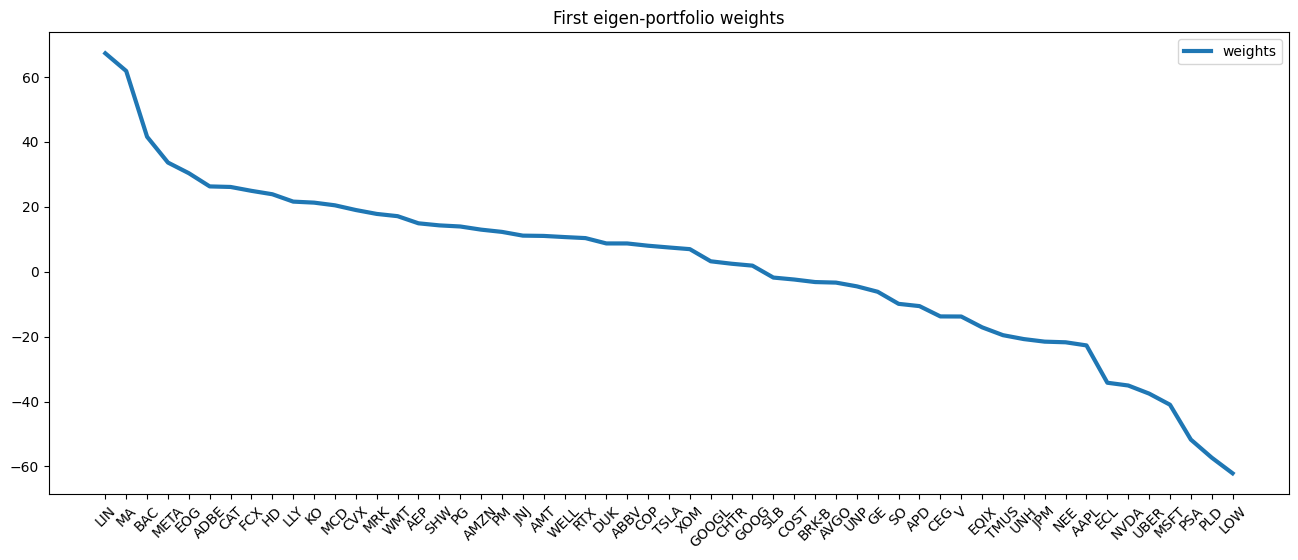

In [ ]:
# the first two eigen-portfolio weights# the fi
# first component
# get the Principal components
pc_w = np.zeros(len(stock_tickers))
eigen_prtf1 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
if pca is not None:
    pcs = pca.components_

    # normalized to 1
    pc_w = pcs[:, 0] / sum(pcs[:, 0])

    eigen_prtf1 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
    eigen_prtf1.sort_values(by=['weights'], ascending=False, inplace=True)
    print('Sum of weights of first eigen-portfolio: %.2f' % np.sum(eigen_prtf1))
    eigen_prtf1.plot(title='First eigen-portfolio weights',
                     figsize=(16,6),
                     xticks=range(0, len(stock_tickers)),
                     rot=45,
                     linewidth=3)

In [ ]:
eigen_prtf1

We sort the first two eigen portfolio weights and plot the results.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
<ipython-input-39-a5034f76bf8c>:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Sum of weights of second eigen-portfolio: %.2f' % np.sum(eigen_prtf2))


Sum of weights of second eigen-portfolio: 100.00


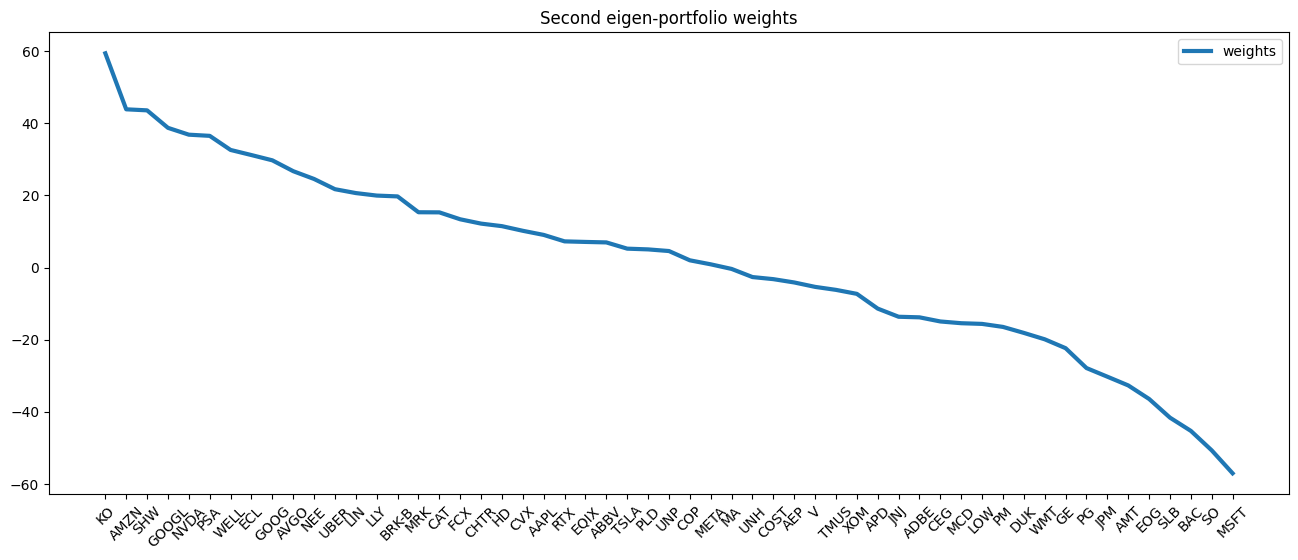

In [ ]:
pc_w = np.zeros(len(stock_tickers))
eigen_prtf2 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)

if pca is not None:
    pcs = pca.components_

    # normalized to 1
    pc_w = pcs[:, 1] / sum(pcs[:, 1])

    eigen_prtf2 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
    eigen_prtf2.sort_values(by=['weights'], ascending=False, inplace=True)
    print('Sum of weights of second eigen-portfolio: %.2f' % np.sum(eigen_prtf2))
    eigen_prtf2.plot(title='Second eigen-portfolio weights',
                     figsize=(16,6),
                     xticks=range(0, len(stock_tickers)),
                     rot=45,
                     linewidth=3)

# Cálculo del desempeño de algunos portafolios


- Usamos la función sharpe_ratio(). Esta función nos regresará los retornos anulizados, vloatilidad anualizada y la razón de Sharpee

- Encontraremos el portafolio con la mayor razón de Sharpee

In [ ]:
def sharpe_ratio(ts_returns, periods_per_year=252):
    """
    sharpe_ratio - Calculates annualized return, annualized vol, and annualized sharpe ratio,
                    where sharpe ratio is defined as annualized return divided by annualized volatility

    Arguments:
    ts_returns - pd.Series of returns of a single eigen portfolio

    Return:
    a tuple of three doubles: annualized return, volatility, and sharpe ratio
    """

    annualized_return = 0.
    annualized_vol = 0.
    annualized_sharpe = 0.

    n_years = ts_returns.shape[0] / periods_per_year
    annualized_return = np.power(np.prod(1 + ts_returns),(1 / n_years)) - 1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol


    return annualized_return, annualized_vol, annualized_sharpe

Hacemos los calculos para los primero 2 eigen-portafolios

First eigen-portfolio:
Return = -16.32%
Volatility = 45.98%
Sharpe = -0.35


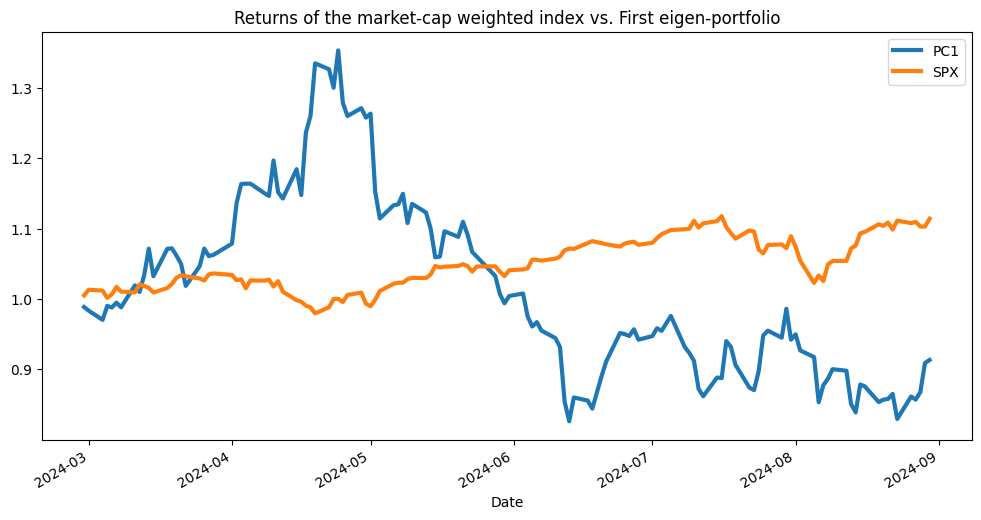

In [ ]:
if df_raw_test is not None:
    eigen_prtf1_returns = np.dot(df_raw_test.loc[:, eigen_prtf1.index], eigen_prtf1 / 100)
    eigen_prtf1_returns = pd.Series(eigen_prtf1_returns.squeeze(), index=df_test.index)
    er, vol, sharpe = sharpe_ratio(eigen_prtf1_returns)
    print('First eigen-portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (er*100, vol*100, sharpe))
    year_frac = (eigen_prtf1_returns.index[-1] - eigen_prtf1_returns.index[0]).days / 252

    df_plot = pd.DataFrame({'PC1': eigen_prtf1_returns, 'SPX': df_raw_test.loc[:, 'SPX']}, index=df_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the market-cap weighted index vs. First eigen-portfolio',
                             figsize=(12,6), linewidth=3)

First eigen-portfolio:
Return = 71.64%
Volatility = 57.91%
Sharpe = 1.24


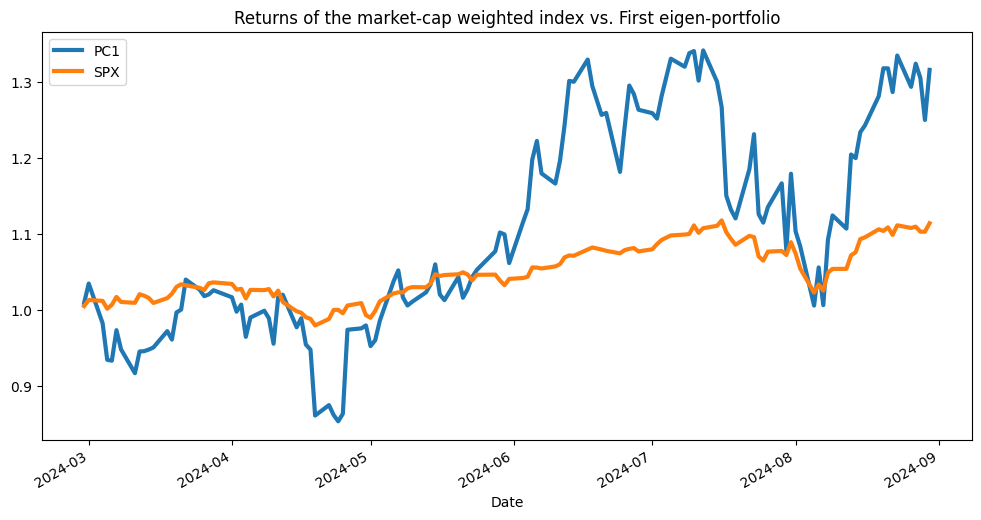

In [ ]:
if df_raw_test is not None:
    eigen_prtf2_returns = np.dot(df_raw_test.loc[:, eigen_prtf2.index], eigen_prtf2 / 100)
    eigen_prtf2_returns = pd.Series(eigen_prtf2_returns.squeeze(), index=df_test.index)
    er, vol, sharpe = sharpe_ratio(eigen_prtf2_returns)
    print('First eigen-portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (er*100, vol*100, sharpe))
    year_frac = (eigen_prtf2_returns.index[-1] - eigen_prtf2_returns.index[0]).days / 252

    df_plot = pd.DataFrame({'PC1': eigen_prtf2_returns, 'SPX': df_raw_test.loc[:, 'SPX']}, index=df_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the market-cap weighted index vs. First eigen-portfolio',
                             figsize=(12,6), linewidth=3)

In [ ]:
if df_raw_test is not None:
    eigen_prtf2_returns = np.dot(df_raw_test.loc[:, eigen_prtf2.index], eigen_prtf2 / 100)
    eigen_prtf2_returns = pd.Series(eigen_prtf2_returns.squeeze(), index=df_test.index)
    er, vol, sharpe = sharpe_ratio(eigen_prtf2_returns)
    print('Second eigen-portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (er*100, vol*100, sharpe))

Second eigen-portfolio:
Return = 71.64%
Volatility = 57.91%
Sharpe = 1.24


Calculamos la razón de Sharpee para los primeros N eigen-portafolios.

Eigen portfolio #12 with the highest Sharpe. Return 60.79%, vol = 20.88%, Sharpe = 2.91


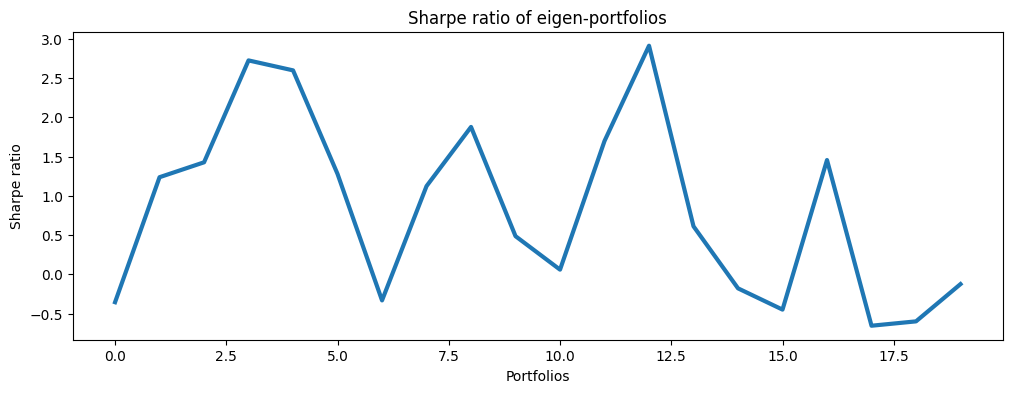

In [ ]:
n_portfolios = 20
annualized_ret = np.array([0.] * n_portfolios)
sharpe_metric = np.array([0.] * n_portfolios)
annualized_vol = np.array([0.] * n_portfolios)
idx_highest_sharpe = 0 # index into sharpe_metric which identifies a portfolio with rhe highest Sharpe ratio

if pca is not None:
    for ix in range(n_portfolios):

        pc_w = pcs[:, ix] / sum(pcs[:, ix])
        eigen_prtfix = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfix.sort_values(by=['weights'], ascending=False, inplace=True)

        eigen_prtix_returns = np.dot(df_raw_test.loc[:, eigen_prtfix.index], eigen_prtfix / 100)
        eigen_prtix_returns = pd.Series(eigen_prtix_returns.squeeze(), index=df_test.index)
        er, vol, sharpe = sharpe_ratio(eigen_prtix_returns)
        annualized_ret[ix] = er
        annualized_vol[ix] = vol
        sharpe_metric[ix] = sharpe


    # find portfolio with the highest Sharpe ratio
    idx_highest_sharpe = np.nanargmax(sharpe_metric)

    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' %
          (idx_highest_sharpe,
           annualized_ret[idx_highest_sharpe]*100,
           annualized_vol[idx_highest_sharpe]*100,
           sharpe_metric[idx_highest_sharpe]))

    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

In [ ]:
results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
results

,Return,Vol,Sharpe
12,0.607944,0.208797,2.911653
3,0.613825,0.225294,2.724547
4,0.518691,0.199664,2.597818
8,0.943497,0.502592,1.877263
11,0.336253,0.197982,1.698398
16,1.474589,1.012758,1.456013
2,0.320370,0.224530,1.426848
5,0.349172,0.273106,1.278521
1,0.716425,0.579113,1.237108
7,0.313776,0.279292,1.123469


# Ventajas:

-

# Desventajas:

-

Referencia:

https://github.com/Doj-i/NYU_Machine_Learning_in_Finance/blob/master/Portfolio%20Construction%20using%20PCA/Eigen-portfolio%20construction%20using%20Principal%20Component%20Analysis%20(PCA)_ML2_ex3.ipynb
